In [1]:
# načtení dat
import pandas as pd

# reading the CSV file
data = pd.read_csv('All_N_rex 5 nm SR 895.csv', sep = ';', header = 0)
df = pd.DataFrame(data)

# vyber kompletnich
df.dropna(axis = 0, how = 'any', inplace = True)

# ulozim si labely abych je pak mohla nalepit
ROI = df.loc[:,"ROI name"]

# odstranim ty popisky
df= df.drop(columns = ['ROI name'])

# pruzkum sloupcu - ktere jsou vadne
"""for i in range(df.shape[1]):
    try:
        df.loc[:,df.columns[i]].astype(float)
    except ValueError as ve:
        print(df.columns[i])
 skoro vsechny - podivala jsem se v R u nekterych techu jsou tady hodnoty I.97... asi jsou to chybné values, vyhodim je, pak se zeptam Renci"""

 # pruzkum radku - ktere jsou vadne
bad_row = []
bad_row_counter = 0
for i in range(df.shape[0]):
    try:
        df.loc[i,:].astype(float)
    except ValueError as ve:
        bad_row_counter += 1
        bad_row.append(i)

"""86 radku obsahuje tady tuto chybu => vyhodim tyto radky (overime pak, jestli muzu)"""

# prilepit zpatky ROI

df['ROI'] = ROI

# odhodit radky kde je divnotyp
df = df.drop(bad_row)

# pretypovat
for i in range(3,97):
    try:
        df.loc[:,df.columns[i]] = df.loc[:,df.columns[i]].astype(float)
    except ValueError as ve:
        print(df.columns[i])

# rozdelit na barvicky
blue = df.loc[df['ROI'] == 'blue']
green = df.loc[df['ROI'] == 'green']
dry = df.loc[df['ROI'] == 'dry']
tech = df.loc[df['ROI'] == 'tech']
soil = df.loc[df['ROI'] == 'soil']

blue= blue.drop(columns = ['ROI'])
dry= dry.drop(columns = ['ROI'])
green= green.drop(columns = ['ROI'])
tech= tech.drop(columns = ['ROI'])
soil= soil.drop(columns = ['ROI'])

C:\Users\h337\AppData\Local\Temp/ipykernel_34392/2839327871.py:5: DtypeWarning: Columns (6,8,10,11,12,16,17,19,20,23,24,25,27,29,33,34,36,38,39,40,41,42,43,44,48,49,50,53,54,55,56,58,59,60,61,63,64,65,68,69,73,74,75,76,79,81,82,83,84,85,86,88,89,90,91,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('All_N_rex 5 nm SR 895.csv', sep = ';', header = 0)
C:\Users\h337\AppData\Local\Temp/ipykernel_34392/2839327871.py:47: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,df.columns[i]] = df.loc[:,df.columns[i]].astype(float)


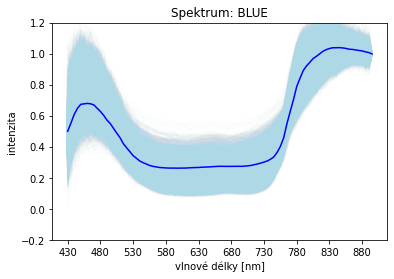

In [3]:
# MODRA SPEKTRA
import statistics as stat
xlabs = blue.columns[3:97]
medblue = []
for i in range(xlabs.size):
    medblue.append(stat.median(blue.loc[:,xlabs[i]]))

# data pro graf modry
blugr = blue.transpose()
blugr = blugr.iloc[3:97,:]
blugr['med'] = medblue
blugr['xlabs'] = xlabs
blugr

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.ylim(-0.2,1.2)
#plt.tight_layout()
for a in range(blugr.shape[1]-1) :
    plt.plot(xlabs, blugr.iloc[:, a], color = 'lightblue', alpha = 0.02)
plt.plot(xlabs, medblue, color = 'blue')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title("Spektrum: BLUE")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

# fig.savefig('BLUE.png', facecolor='w') # uložení
  




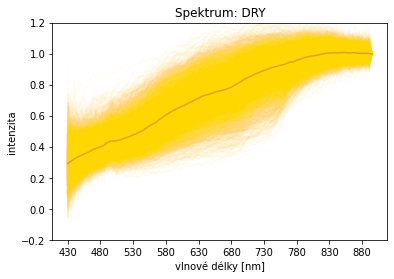

In [5]:
# DRY SPEKTRA
import statistics as stat
xlabs = dry.columns[3:97]
meddry = []
for i in range(xlabs.size):
    meddry.append(stat.median(dry.loc[:,xlabs[i]]))

# data pro graf dry
drygr = dry.transpose()
drygr = drygr.iloc[3:97,:]
drygr['med'] = meddry
drygr['xlabs'] = xlabs
drygr

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.ylim(-0.2,1.2)
#plt.tight_layout()
for a in range(drygr.shape[1]-1) :
    plt.plot(xlabs, drygr.iloc[:, a], color = 'gold', alpha = 0.02)
plt.plot(xlabs, meddry, color = 'goldenrod')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title("Spektrum: DRY")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

#fig.savefig('DRY.png', facecolor='w') # uložení
  






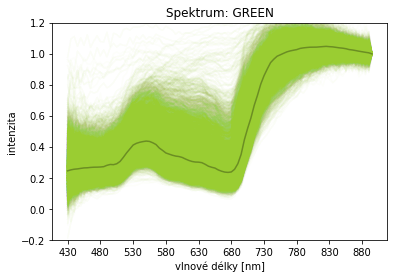

In [6]:
# GREEN SPEKTRA
import statistics as stat
xlabs = green.columns[3:97]
medgreen = []
for i in range(xlabs.size):
    medgreen.append(stat.median(green.loc[:,xlabs[i]]))

# data pro graf modry
gregr = green.transpose()
gregr = gregr.iloc[3:97,:]
gregr['med'] = medgreen
gregr['xlabs'] = xlabs
gregr

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.ylim(-0.2,1.2)
#plt.tight_layout()
for a in range(gregr.shape[1]-1) :
    plt.plot(xlabs, gregr.iloc[:, a], color = 'yellowgreen', alpha = 0.02)
plt.plot(xlabs, medgreen, color = 'olivedrab')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title("Spektrum: GREEN")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

# fig.savefig('GREEN.png', facecolor='w') # uložení
  




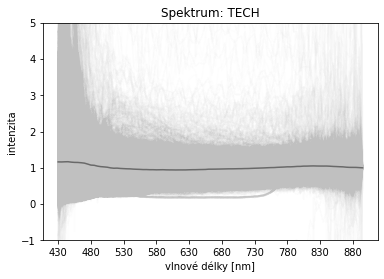

In [7]:
# TECH SPEKTRA
import statistics as stat
xlabs = tech.columns[3:97]
medtech = []
for i in range(xlabs.size):
    medtech.append(stat.median(tech.loc[:,xlabs[i]]))

# data pro graf modry
tecgr = tech.transpose()
tecgr = tecgr.iloc[3:97,:]
tecgr['med'] = medtech
tecgr['xlabs'] = xlabs
tecgr

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.ylim(-1,5)
#plt.tight_layout()
for a in range(tecgr.shape[1]-1) :
    plt.plot(xlabs, tecgr.iloc[:, a], color = 'silver', alpha = 0.02)
plt.plot(xlabs, medtech, color = 'dimgrey')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title("Spektrum: TECH")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

# fig.savefig('TECH.png', facecolor='w') # uložení
  




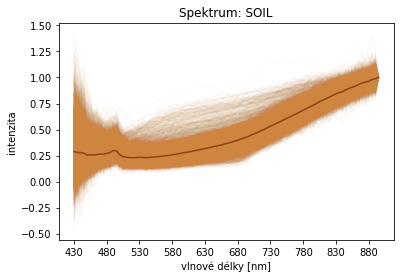

In [8]:
# SOIL SPEKTRA
import statistics as stat
xlabs = soil.columns[3:97]
medsoil = []
for i in range(xlabs.size):
    medsoil.append(stat.median(soil.loc[:,xlabs[i]]))

# data pro graf modry
soigr = soil.transpose()
soigr = soigr.iloc[3:97,:]
soigr['med'] = medsoil
soigr['xlabs'] = xlabs
soigr

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

#plt.tight_layout()
for a in range(soigr.shape[1]-1) :
    plt.plot(xlabs, soigr.iloc[:, a], color = 'peru', alpha = 0.02)
plt.plot(xlabs, medsoil, color = 'saddlebrown')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title("Spektrum: SOIL")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

# fig.savefig('SOIL.png', facecolor='w') # uložení
  




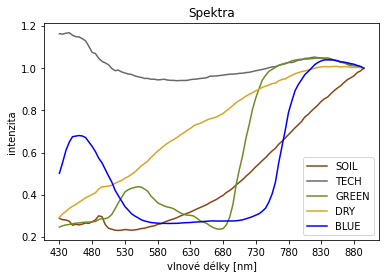

In [14]:
fig, ax = plt.subplots()

#plt.tight_layout()
plt.plot(xlabs, medsoil, color = 'saddlebrown', label = 'SOIL')
plt.plot(xlabs, medtech, color = 'dimgrey', label = 'TECH')
plt.plot(xlabs, medgreen, color = 'olivedrab', label = 'GREEN')
plt.plot(xlabs, meddry, color = 'goldenrod', label = 'DRY')
plt.plot(xlabs, medblue, color = 'blue', label = 'BLUE')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title('Spektra')
plt.legend()
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

#fig.savefig('spektra_MED.png', facecolor='w') # uložení

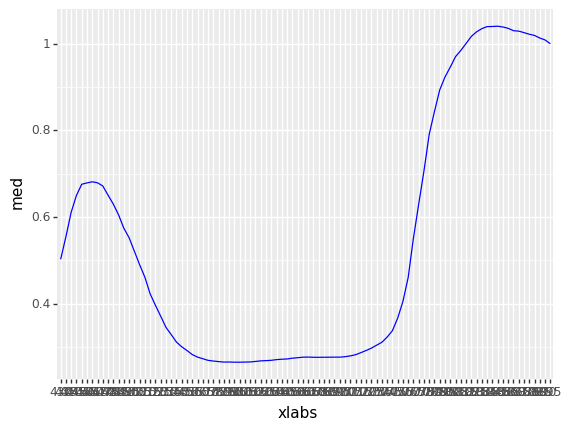

<ggplot: (160106382695)>

In [9]:
from plotnine import ggplot, aes, geom_line, facet_grid, labs, geom_col

# vykresli median
(
    ggplot(blugr)  # What data to use 
    + aes(x='xlabs', y='med', group = 1) # What variable to use
    + geom_line(color = 'blue')  # Geometric object to use for drawing
    #+ theme_xkcd()
)
